### **Scikit-Learn Coding Challenge #2: Data Exploration & Visualization**  
**Topic:** Understanding Dataset Structure & Visualizing Patterns  

---

### **Problem Description**  
In this challenge, you will **explore and visualize a dataset** to gain insights into its structure. Your goal is to:  
1. **Load a dataset** from Scikit-learn (`load_wine()` or `load_breast_cancer()`).  
2. **Perform exploratory data analysis (EDA)**, including:
   - Displaying dataset shape, feature names, and target distribution.  
   - Calculating basic summary statistics (mean, std, min, max).  
3. **Visualize relationships and distributions** using:
   - Histograms of numerical features  
   - Pairplot to show feature relationships  
   - Boxplots to detect outliers  
   - Correlation matrix heatmap  

---

### **Constraints**  
✅ **Must use a built-in dataset**: `load_wine()` or `load_breast_cancer()`  
✅ **Use Pandas, Matplotlib, and Seaborn** for EDA and visualization  
✅ **Ensure figures are well-labeled and readable**  
✅ **Code should be modular** (e.g., using functions where appropriate)  

---

### **Example Input & Output**  
**Example: Using the Wine dataset (`load_wine()`)**  
```plaintext
Dataset Name: Wine
Number of Samples: 178
Number of Features: 13
Feature Names: ['alcohol', 'malic_acid', 'ash', ..., 'proline']
Target Classes: [0, 1, 2]

Summary Statistics:
       alcohol  malic_acid  ash  ...  flavanoids  proanthocyanins  proline
count   178.00      178.00  ...      178.00         178.00      178.00
mean     13.00        2.00  ...        2.00           1.00     1050.00
std       1.00        1.00  ...        1.00           0.50      500.00
min      11.00        0.70  ...        0.10           0.10      270.00
max      15.00        5.80  ...        5.00           3.50     1680.00
```
_Visualizations: Histograms, Pairplot, Boxplots, and a Correlation Heatmap should be displayed._  

---

### **Hints**  
- Use `datasets.load_<dataset>()` to load the dataset.  
- Convert it to a **Pandas DataFrame** for analysis.  
- Use **`.describe()`** for basic stats.  
- Use **`sns.histplot()`, `sns.pairplot()`, `sns.boxplot()`, and `sns.heatmap()`** for visualization.  

---

### **Bonus Challenge** 🎯  
1. **Standardize numerical features** (use `StandardScaler`) and visualize the effect on distributions.  
2. **Find the most correlated feature with the target** and analyze its importance.  

---

🚀 **Once you implement a solution, share it, and I'll review it with time & space complexity analysis plus suggestions!**

# Solution

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the Wine dataset
wine = datasets.load_wine()

# Convert to a Pandas DataFrame
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [3]:
# Display basic dataset information
print(f"Dataset Name: Wine")
print(f"Number of Samples: {df.shape[0]}")
print(f"Number of Features: {df.shape[1] - 1}")  # Excluding the target column
print(f"Feature Names: {wine.feature_names}")
print(f"Target Classes: {np.unique(wine.target)}")

Dataset Name: Wine
Number of Samples: 178
Number of Features: 13
Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Classes: [0 1 2]


---
**NOTE:**
The **target column** in the Wine dataset represents the **type of wine**, not its quality. Specifically:

- The target is a **categorical variable** with **three classes**:
  - **0:** Class 0 (Wine class 1)
  - **1:** Class 1 (Wine class 2)
  - **2:** Class 2 (Wine class 3)

These classes correspond to three different types of wine derived from the **chemical analysis** of wines grown in the same region in Italy but derived from three different cultivars (grape varieties).

---

In [4]:
# Display summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


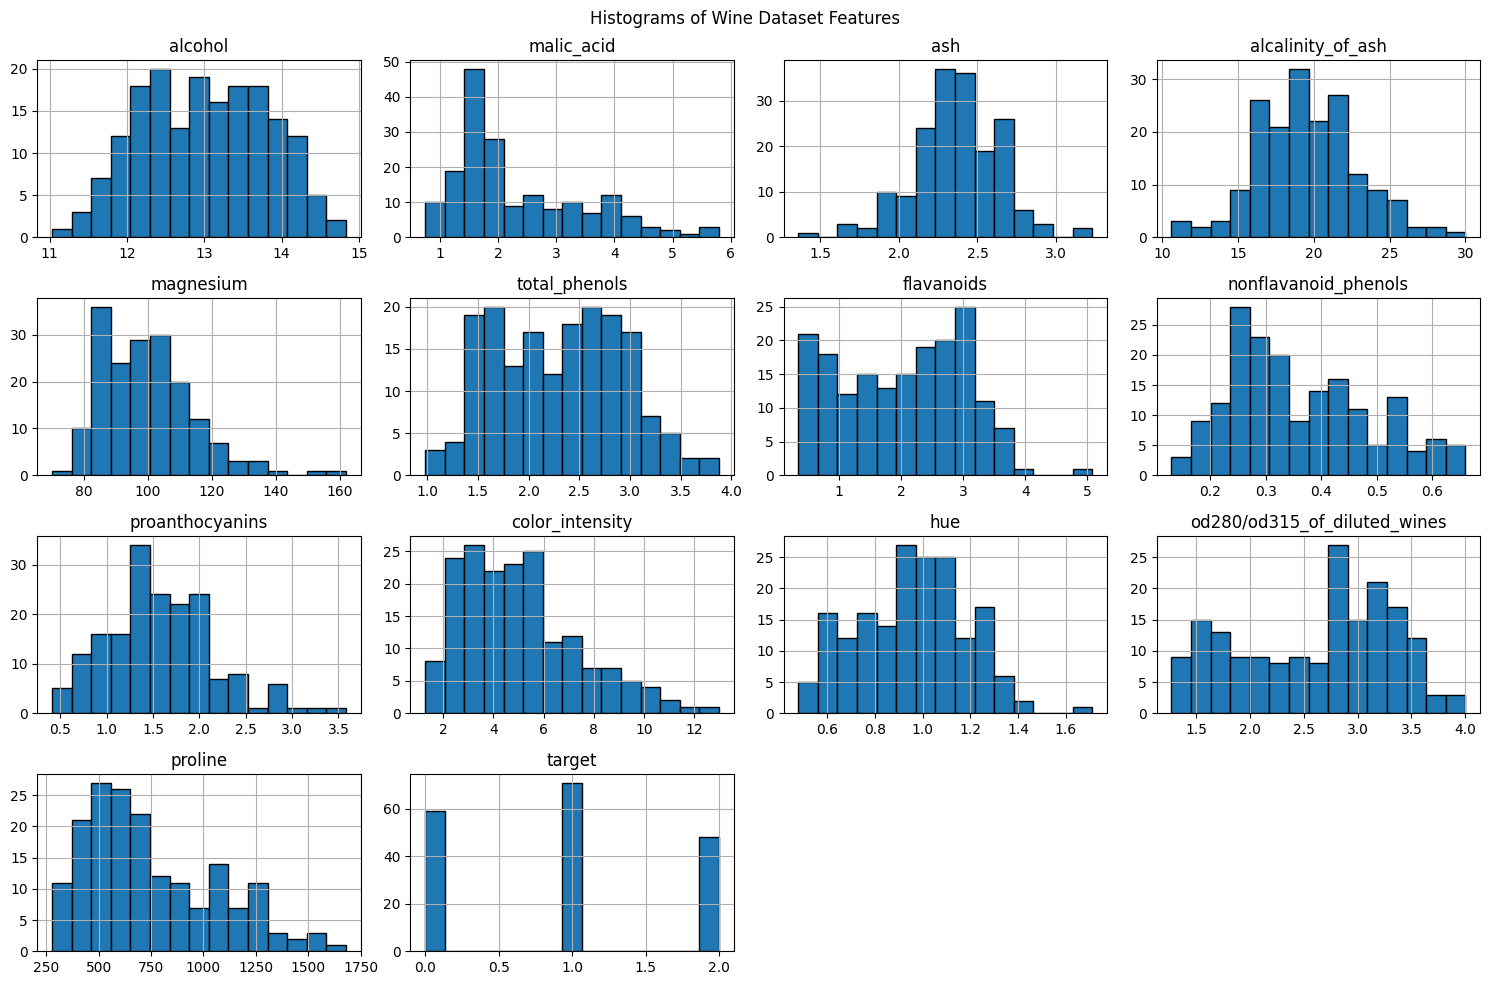

In [5]:
# Visualization - Histograms of numerical features
df.hist(bins=15, figsize=(15, 10), edgecolor='k')
plt.suptitle('Histograms of Wine Dataset Features')
plt.tight_layout()

Text(0.5, 1.02, 'Pairplot of Wine Dataset')

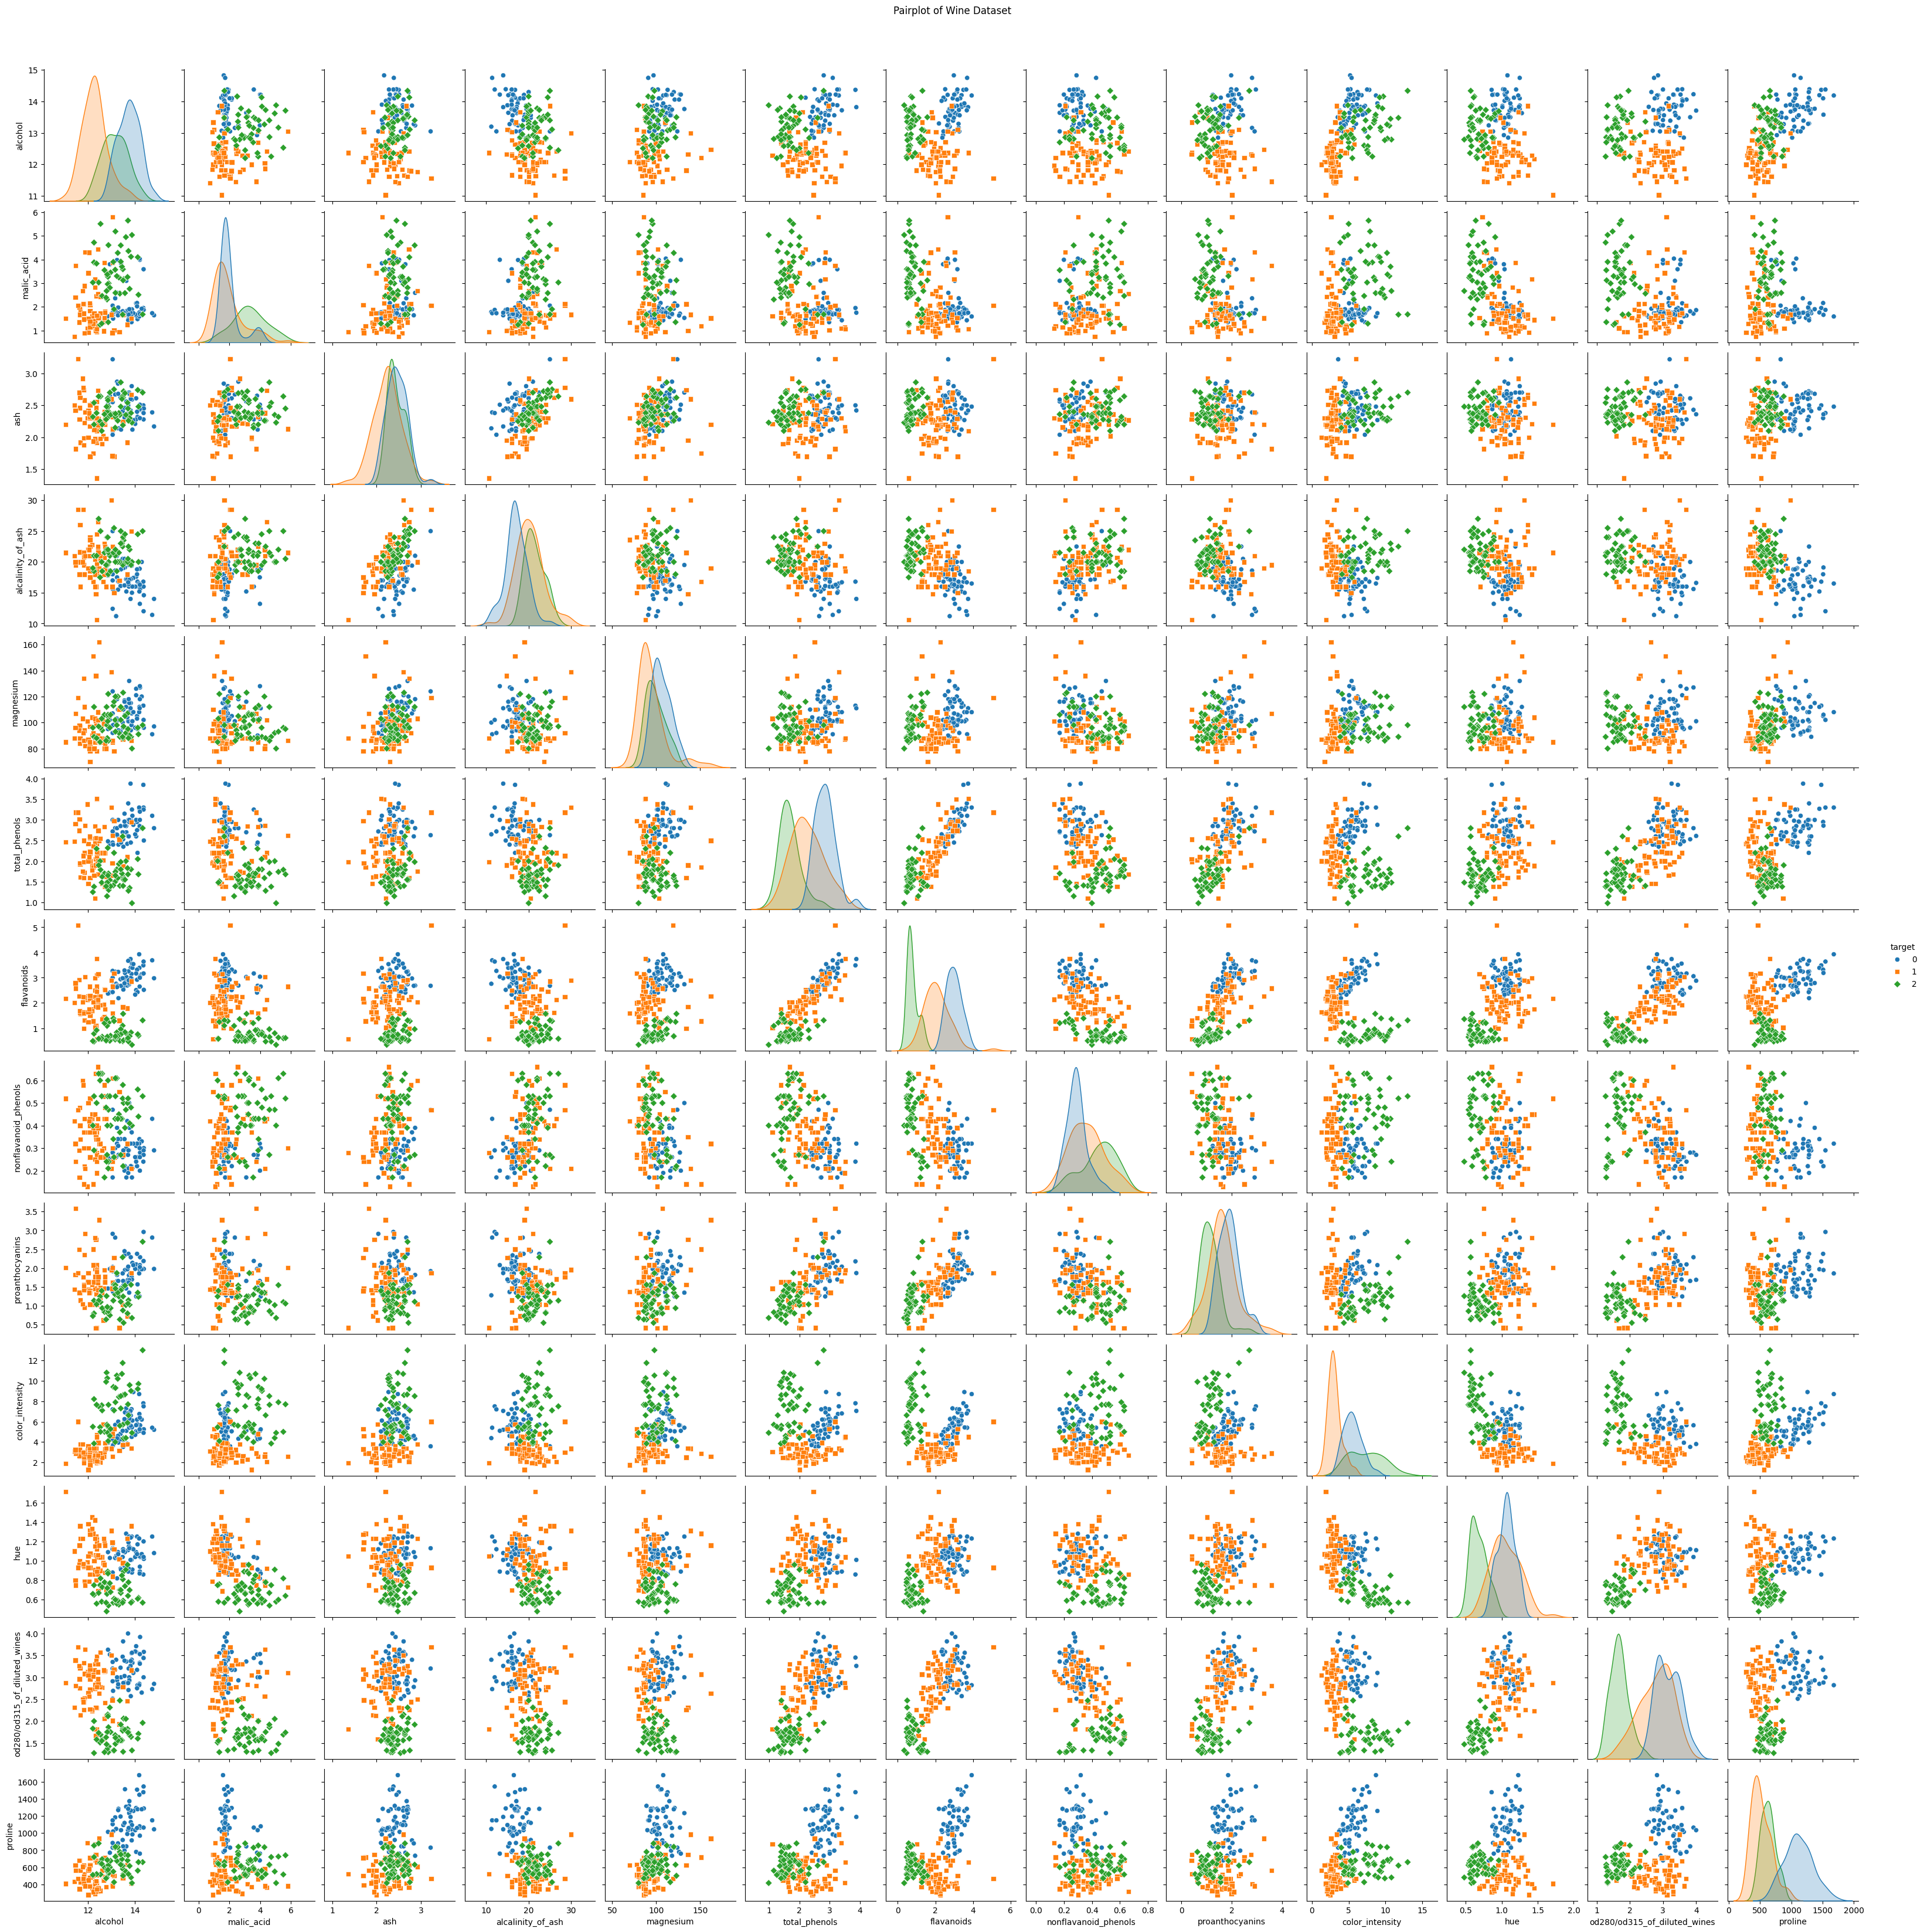

In [6]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='target', palette='tab10', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Wine Dataset", y=1.02)

---
**NOTE:**
- **`markers=["o", "s", "D"]`**:
  - Specifies the **marker style** for each class in the `target` column.
  - `"o"` → Circle marker for **Class 0**.
  - `"s"` → Square marker for **Class 1**.
  - `"D"` → Diamond marker for **Class 2**.
  - This is useful to visually **distinguish data points** from different classes in scatter plots.

- **`y=1.02` in `plt.suptitle()`**:
  - Adjusts the **vertical position** of the **subplot title**.
  - The default `y=1.0` places the title right above the plots.
  - `y=1.02` moves the title a bit higher, improving the **readability** and **separation** from the plot grid.

---

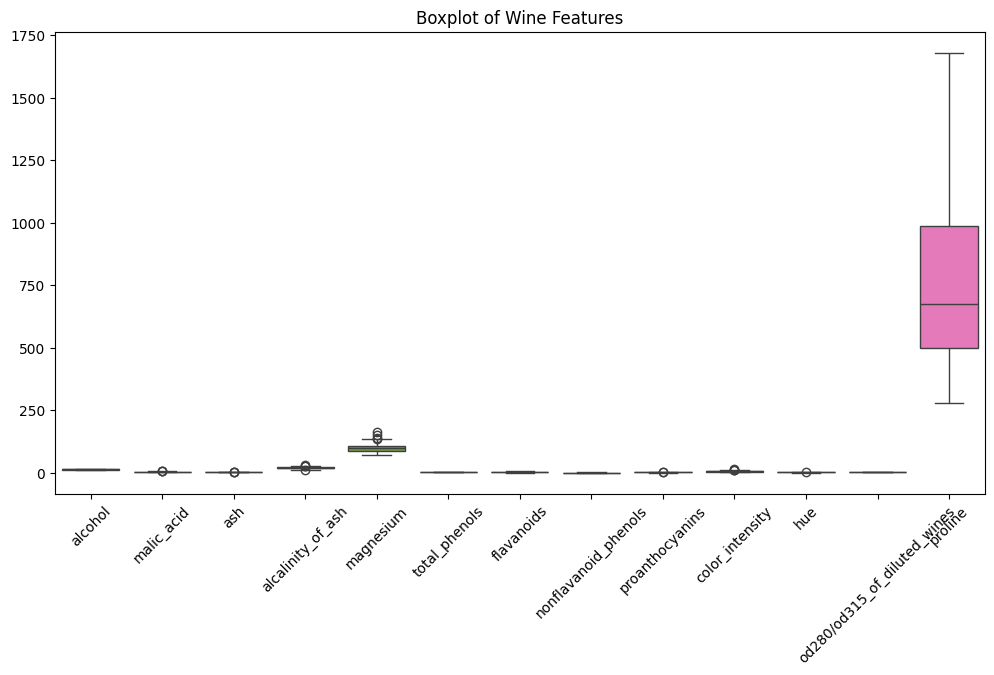

In [7]:
# Boxplot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['target']))
plt.title("Boxplot of Wine Features")
plt.xticks(rotation=45);

Text(0.5, 1.0, 'Feature Correlation Matrix')

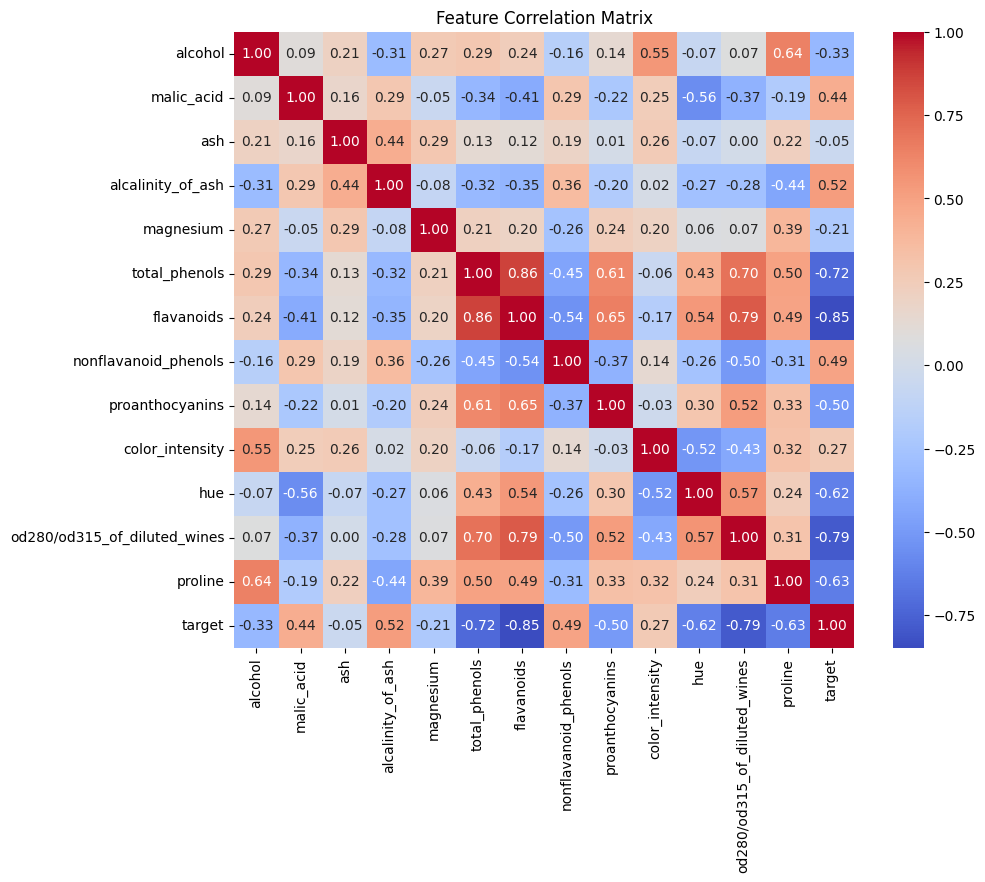

In [8]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")

---
**NOTE:**
- **`fmt=".2f"`**:
  - Controls the **formatting** of the **annotated values** in the heatmap.
  - **`.2f`** means **"two decimal places"**, indicating a **floating-point number** with **two decimals**.
  - Example:
    - `0.12345` will be displayed as `0.12`.
    - `-0.6789` will be displayed as `-0.68`.

This ensures **consistency** and **readability** of the correlation values in the heatmap.

---

In [9]:
# Bonus: Standardize features and visualize distribution
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['target'])), columns=wine.feature_names)

---
**NOTE:**
- **What `StandardScaler` does:**
  - It **standardizes features** by **removing the mean** and **scaling to unit variance**.
  - Formula applied to each feature \(x\):
  $
  x_{scaled} = \frac{x - \mu}{\sigma}
  $
  where:
  - $ \mu $ is the **mean** of the feature.
  - $ \sigma $ is the **standard deviation** of the feature.
  - After scaling, each feature will have a **mean of 0** and a **standard deviation of 1**.

- **How it changes the histogram:**
  - Before scaling, features may have **different ranges** and **distributions**.
  - After scaling:
    - The **center** of the data is shifted to **0**.
    - The **spread** of data is normalized to have **unit variance**.
    - Histograms of scaled data often appear more **standardized**, showing peaks around **0** with a similar **spread**.

This is particularly useful for **machine learning models** that are **sensitive to feature scaling**, such as **SVMs** or **K-means clustering**.

---

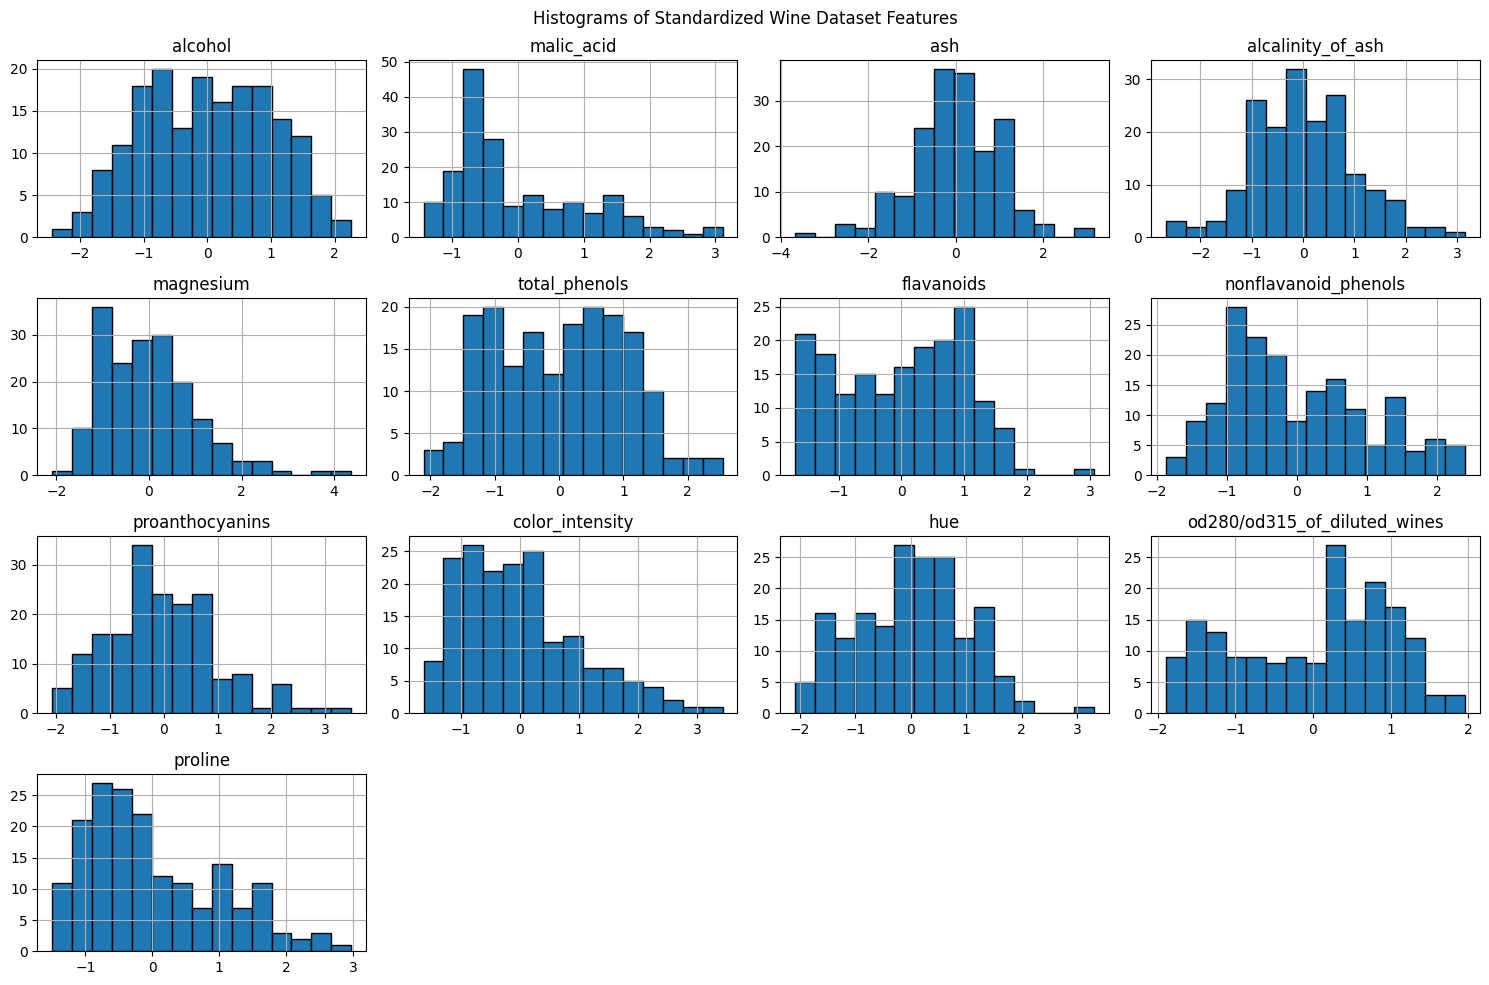

In [10]:
# Visualize standardized data
df_scaled.hist(bins=15, figsize=(15, 10), edgecolor='k')
plt.suptitle('Histograms of Standardized Wine Dataset Features')
plt.tight_layout()

In [11]:
# Find the most correlated feature with the target
corr_matrix = df.corr()
most_correlated = corr_matrix['target'].drop('target').idxmax()
print(f"\nMost correlated feature with the target: {most_correlated}")


Most correlated feature with the target: alcalinity_of_ash


---
**NOTE:**
- **What `idxmax()` does:**
  - Returns the **index of the maximum value** in a **Series**.
  - In this context, it finds the feature that has the **highest positive correlation** with the `target` column.

- **What about negative correlations?**
  - `idxmax()` only considers **positive values**.
  - If you are interested in the **strongest overall correlation** (whether positive or negative), you should use **`abs()`** to compute the **absolute value** of correlations:
```python
most_correlated = corr_matrix['target'].drop('target').abs().idxmax()
```
- This would account for **both positive and negative correlations** and return the feature with the **highest absolute correlation**.

- **Example:**
  - If `flavanoids` has a strong **negative correlation** of `-0.8` with `target`, and `proline` has a **positive correlation** of `0.6`, then:
    - `idxmax()` would return **`proline`**.
    - Using **`abs().idxmax()`** would return **`flavanoids`**, since **`| -0.8 | > 0.6`**.

---

### **Explanation of the Solution**

1. **Loading the Dataset**  
   - The `load_wine()` function from **Scikit-learn** loads the Wine dataset.  
   - The data is converted into a **Pandas DataFrame** for easier analysis.

2. **Data Summary**  
   - The code displays the **number of samples, features**, and **unique target classes**.  
   - **Summary statistics** are generated using `.describe()`.

3. **Data Visualization**  
   - **Histograms (`df.hist()`)** visualize distributions of all numerical features.  
   - **Pairplot (`sns.pairplot()`)** reveals relationships between features, colored by target class.  
   - **Boxplot (`sns.boxplot()`)** detects potential outliers in features.  
   - **Correlation Heatmap (`sns.heatmap()`)** highlights correlated features.

4. **Standardization (Bonus)**  
   - The **StandardScaler** is used to standardize the data.  
   - **Histograms** are plotted again to show the effect of standardization.

5. **Identifying the Most Correlated Feature**  
   - The **correlation matrix** is analyzed to find the feature most correlated with the target variable.

---

### **Time & Space Complexity Analysis**

#### **Time Complexity**
- **Loading Data:** $O(n)$, where $n$ is the number of samples.
- **Dataframe Operations:** $O(n)$ for `.describe()`, `.map()`, and `.corr()`.
- **Visualizations:** ~ $O(n^2)$ for scatterplots and heatmaps.
- **Standardization:** $O(n \times m)$, where $m$ is the number of features.

#### **Space Complexity**
- **Dataset Storage:** $O(n \times m)$ for storing data in a DataFrame.
- **Visualization Storage:** $O(n^2)$ for pairplots and heatmaps.
- **Standardized Data:** Additional $O(n \times m)$ for scaled data storage.

---
